In [44]:
file_location = r"category_2.xlsx"

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline
plt.style.use('fivethirtyeight')

In [46]:
df = pd.read_excel(file_location)
df

,category,Timestamp,Username,1. What is your gender?,2. What is your age?,3. Which country you are currently working at?(skip this if you are unemployed),Average Icnome,4. Choose your income level (in terms of US dollar),5. Choose your highest education level,6. Choose your academic status,...,Please select only one option for each row. [23. I feel stress about my study],Please select only one option for each row. [24. I think that most of the knowledges I'm learning now might not be useful in the future occupation.],Please select only one option for each row. [25. I knew a lot of friends in college or university],Please select only one option for each row. [26. I believe that college degree study can equip me with a lot of knowledges that make me outstanding and competitive once I have graduated.],21. Why am I not pursuing a college degree?,Please select only one option for each row. [22. I am satisfy with my life even without a college degree.],Please select only one option for each row. [23. I feel less competitive to those who possess a college degree.],Please select only one option for each row. [24. I feel less confident. ],Please select only one option for each row. [25. I always worry my future because of not having a college degree.],Please select only one option for each row. [26. I think that my life and achievements could be better off and happier if I possess a college degree.]
0,Degree Holder,2022/05/30 2:13:35 PM GMT+8,NaN,Male,23-30,Malaysia,9829.5,"8,700 - 10,959",Doctorate Degree,graduates and having at least college degree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Degree Holder,2022/05/16 10:53:57 AM GMT+8,NaN,Female,18-22,Malaysia,5364.5,"4,850 - 5,879",College Degree,Currently pursuing college degree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Degree Holder,2022/05/16 5:30:10 PM GMT+8,NaN,Male,18-22,Malaysia,2834.5,"2,500 - 3,169",College Degree,graduates and having at least college degree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Degree Holder,2022/05/18 11:16:20 AM GMT+8,NaN,Male,23-30,China,5364.5,"4,850 - 5,879",College Degree,graduates and having at least college degree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Degree Holder,2022/06/07 11:49:11 PM GMT+8,NaN,Male,23-30,Malaysia,2500.0,Below 2500,College Degree,graduates and having at least college degree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Nondegree holder,2022/05/30 9:00:59 AM GMT+8,NaN,Male,Over 30,United States of America,2500.0,Below 2500,High Schooler or Below,high schooler,...,NaN,NaN,NaN,NaN,College Degree will not teach me what I want.,Disagree,Agree,Agree,Agree,Agree
101,Nondegree holder,2022/05/30 8:58:33 AM GMT+8,NaN,Female,Over 30,Malaysia,2500.0,Below 2500,High Schooler or Below,high schooler,...,NaN,NaN,NaN,NaN,Don't have an idea on which course to study,Disagree,Strongly Agree,Strongly Agree,Agree,Strongly Agree
102,Nondegree holder,2022/05/30 8:57:02 AM GMT+8,NaN,Female,23-30,China,2500.0,Below 2500,High Schooler or Below,high schooler,...,NaN,NaN,NaN,NaN,Can't afford high tuition fees,Disagree,Agree,Agree,Agree,Agree
103,Nondegree holder,2022/05/30 8:38:13 AM GMT+8,NaN,Female,23-30,Canada,6489.5,"5,880 - 7,099",Foundation,nongraduates,...,NaN,NaN,NaN,NaN,College Degree will not teach me what I want.,Strongly Agree,Disagree,Disagree,Disagree,Neutral


# Linkage between Emotional Health and education level

In [47]:
cols = ["17. How do you rate your emotional (mental) health?", '4. Choose your income level (in terms of US dollar)', '5. Choose your highest education level', '18. How do you view your emotional (mental) health?']
l1 = df.loc[:, cols].rename(columns={
    cols[0]  : 'Emotional Health Score(1-10)',
    cols[1]  : 'Income Level',
    cols[2]  : 'Highest Education Level',
    cols[-1] : 'Emotional Stability'
})
l1

,Emotional Health Score(1-10),Income Level,Highest Education Level,Emotional Stability
0,8,"8,700 - 10,959",Doctorate Degree,3
1,6,"4,850 - 5,879",College Degree,3
2,8,"2,500 - 3,169",College Degree,3
3,10,"4,850 - 5,879",College Degree,4
4,3,Below 2500,College Degree,2
...,...,...,...,...
100,4,Below 2500,High Schooler or Below,2
101,2,Below 2500,High Schooler or Below,2
102,3,Below 2500,High Schooler or Below,1
103,8,"5,880 - 7,099",Foundation,3


In [48]:
em_stab = l1['Emotional Stability'].unique()
em_stab_scores = dict(zip(em_stab, [3, 2, 4, 1]))  # 1 = very unstable, 2 = unstable, 3 = stable, 4 = very stable
for em_stab_score in em_stab_scores:
    l1['Emotional Stability'] = l1['Emotional Stability'].apply(lambda x: em_stab_scores[em_stab_score] if x == em_stab_score else x)
l1

,Emotional Health Score(1-10),Income Level,Highest Education Level,Emotional Stability
0,8,"8,700 - 10,959",Doctorate Degree,3
1,6,"4,850 - 5,879",College Degree,3
2,8,"2,500 - 3,169",College Degree,3
3,10,"4,850 - 5,879",College Degree,4
4,3,Below 2500,College Degree,4
...,...,...,...,...
100,4,Below 2500,High Schooler or Below,4
101,2,Below 2500,High Schooler or Below,4
102,3,Below 2500,High Schooler or Below,1
103,8,"5,880 - 7,099",Foundation,3


In [49]:
l1['Highest Education Level'].unique()

array(['Doctorate Degree', 'College Degree', 'Master Degree',
       'High Schooler or Below', 'Foundation'], dtype=object)

In [50]:
l1['Income Level'].unique()

array(['8,700 - 10,959', '4,850 - 5,879', '2,500 - 3,169', 'Below 2500',
       '7,110 - 8,699', '5,880 - 7,099', 'Full-time student',
       'Unemployed', '3,970 - 4,849'], dtype=object)

In [51]:
l1.loc[(((l1['Highest Education Level'] == 'College Degree') & (l1['Income Level'] != 'Full-time student')) | (l1['Highest Education Level'] == 'Master Degree') | (l1['Highest Education Level'] == 'Doctorate Degree')), :]

,Emotional Health Score(1-10),Income Level,Highest Education Level,Emotional Stability
0,8,"8,700 - 10,959",Doctorate Degree,3
1,6,"4,850 - 5,879",College Degree,3
2,8,"2,500 - 3,169",College Degree,3
3,10,"4,850 - 5,879",College Degree,4
4,3,Below 2500,College Degree,4
5,4,Below 2500,College Degree,4
6,8,"4,850 - 5,879",College Degree,3
7,9,"4,850 - 5,879",College Degree,3
8,7,"7,110 - 8,699",Doctorate Degree,3
9,6,"7,110 - 8,699",College Degree,3


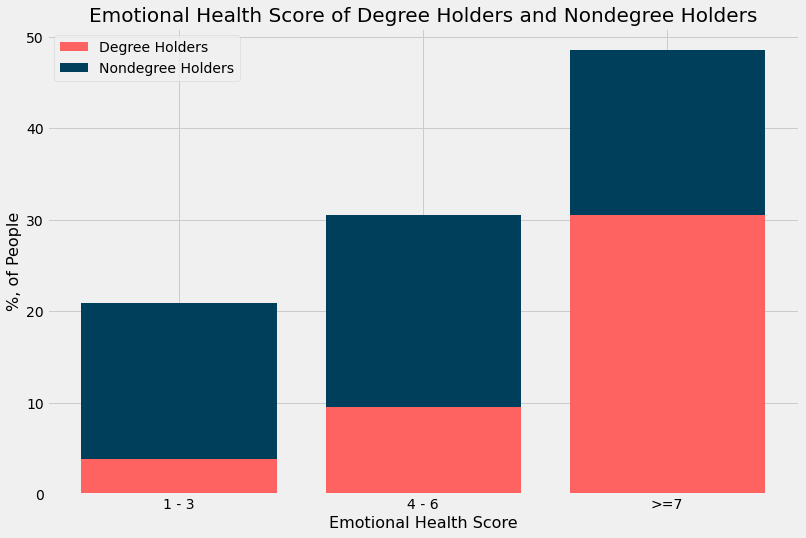

In [52]:
em_health_score = ['1 - 3', '4 - 6', '>=7']

degree_holder_less_than_av_score = l1.query("(`Emotional Health Score(1-10)` <= 3) & (`Income Level` != 'Full-time student') & (`Highest Education Level` == 'College Degree' | `Highest Education Level` == 'Master Degree' | `Highest Education Level` == 'Doctorate Degree')").shape[0]
degree_holder_av_score = l1.query("(`Emotional Health Score(1-10)` >= 4 & `Emotional Health Score(1-10)` <= 6) & (`Income Level` != 'Full-time student') & (`Highest Education Level` == 'College Degree' | `Highest Education Level` == 'Master Degree' | `Highest Education Level` == 'Doctorate Degree')").shape[0]
degree_holder_above_av_score = l1.query("(`Emotional Health Score(1-10)` >= 7) & (`Income Level` != 'Full-time student') & (`Highest Education Level` == 'College Degree' | `Highest Education Level` == 'Master Degree' | `Highest Education Level` == 'Doctorate Degree')").shape[0]
degree_holders = [degree_holder_less_than_av_score, degree_holder_av_score, degree_holder_above_av_score]

non_degree_holder_less_than_av_score = l1.query("(`Emotional Health Score(1-10)` <= 3) & (`Highest Education Level` == 'Foundation' | `Highest Education Level` == 'High Schooler or Below' | (`Highest Education Level` == 'College Degree' & `Income Level` == 'Full-time student'))").shape[0]
non_degree_holder_av_score = l1.query("(`Emotional Health Score(1-10)` >= 4 & `Emotional Health Score(1-10)` <= 6) & (`Highest Education Level` == 'Foundation' | `Highest Education Level` == 'High Schooler or Below' | (`Highest Education Level` == 'College Degree' & `Income Level` == 'Full-time student'))").shape[0]
non_degree_holder_above_av_score = l1.query("(`Emotional Health Score(1-10)` >= 7) & (`Highest Education Level` == 'Foundation' | `Highest Education Level` == 'High Schooler or Below' | (`Highest Education Level` == 'College Degree' & `Income Level` == 'Full-time student'))").shape[0]
non_degree_holders = [non_degree_holder_less_than_av_score, non_degree_holder_av_score, non_degree_holder_above_av_score]

t_sample = np.array([np.array([(d, nd) for d, nd in zip(degree_holders, non_degree_holders)]).flatten()])

em_health_df = pd.DataFrame(t_sample, columns=pd.MultiIndex.from_product([['1 - 3', '4 - 6', '>=7'], ['Degree Holder', 'Nondegree Holder']]))
em_health_df = em_health_df.T
em_health_df.index.name = 'Emotional Health Score'
em_health_df.rename(columns={0 : 'Number Of People'}, inplace=True)

fig, ax = plt.subplots(figsize=(12,8))
degree_holders = [d / l1.shape[0]  * 100 for d in degree_holders]
non_degree_holders = [nd / l1.shape[0]  * 100 for nd in non_degree_holders]
ax.bar(em_health_score, degree_holders, color='#ff6361');
ax.bar(em_health_score, non_degree_holders, bottom=degree_holders, color='#003f5c');
plt.xlabel('Emotional Health Score', fontsize=16)
plt.ylabel('%, of People', fontsize=16)
plt.legend(['Degree Holders', 'Nondegree Holders'], fontsize=14)
plt.title('Emotional Health Score of Degree Holders and Nondegree Holders', fontsize=20);

for index in em_health_score:
    em_health_df.loc[index, 'Percentage Of People'] = em_health_df.loc[index, 'Number Of People'].values / df.shape[0]
em_health_df.to_clipboard(excel=True)
plt.savefig('Emotional Health Score of Degree Holders and Nondegree Holders.png', bbox_inches='tight');

## Correlation between Degree Holder and Emotional Health

### Degree Holders

In [53]:
degree_holders_df = l1.query("((`Highest Education Level` == 'College Degree' & `Income Level` != 'Full-time student') | `Highest Education Level` == 'Master Degree' | `Highest Education Level` == 'Doctorate Degree')")
degree_holders_df['Emotional Health Score(1-10)'].value_counts().sort_index()
# degree_holders_df

3      4
4      5
5      3
6      2
7     10
8     10
9      7
10     5
Name: Emotional Health Score(1-10), dtype: int64

### Nondegree Holders

In [54]:
nondegree_holders_df = l1.query("((`Highest Education Level` == 'College Degree' & `Income Level` == 'Full-time student') | `Highest Education Level` == 'Foundation' | `Highest Education Level` == 'High Schooler or Below')")
nondegree_holders_df['Emotional Health Score(1-10)'].value_counts().sort_index().to_clipboard(excel=True, index=True, header=False)

# Descriptive Statistic

## Degree Holders

In [61]:
cols = ['Please select only one option for each row. [25. I learned skills and knowledges in college.]', 'Please select only one option for each row. [26. I knew myriads of new friends in college or university.]', 'Please select only one option for each row. [29. Without a college degree, I am not able to reach my current achievement.]']
l2 = df.loc[:, cols].copy()
l2 = l2.dropna(axis=0)
items = {
    'Strongly disagree' : 1,
    'Disagree' : 2,
    'Neutral' : 3,
    'Agree' : 4,
    'Strongly agree' : 5
}

for item in items:
    l2 = l2.replace(item, items[item], regex=True)
mean_score = l2.std(axis=0)
mean_score
# l2['Please select only one option for each row. [25. I learned skills and knowledges in college.]'].value_counts().sort_index()

Please select only one option for each row. [25. I learned skills and knowledges in college.]                                 0.758845
Please select only one option for each row. [26. I knew myriads of new friends in college or university.]                     0.760117
Please select only one option for each row. [29. Without a college degree, I am not able to reach my current achievement.]    1.058666
dtype: float64

In [30]:
l2

,Please select only one option for each row. [25. I learned skills and knowledges in college.],Please select only one option for each row. [26. I knew myriads of new friends in college or university.],"Please select only one option for each row. [29. Without a college degree, I am not able to reach my current achievement.]"
0,4,4,4
1,1,3,1
2,4,4,5
3,5,5,3
6,4,5,4
7,4,4,4
8,4,4,2
9,4,4,4
10,4,4,2
11,4,4,3
